In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

import statistics
import clean_data

In [2]:
def get_height_inches(player_row):
    h = player_row["height"]
    ih = 0
    if len(h) >= 3:
        ih = int(h[0]) * 12 + int(h[2:])
        h = ih
    h = int(h)
    return h

In [3]:
def clean_players_height(players):
    players["height"] = players.apply(get_height_inches, axis=1)
    return players

In [4]:
games = pd.read_csv('data/games.csv')
PFF = pd.read_csv('data/PFFScoutingData.csv')
players = pd.read_csv('data/players.csv')
plays = pd.read_csv('data/plays.csv')
tracking2018 = pd.read_csv('data/tracking2018.csv')
tracking2019 = pd.read_csv('data/tracking2019.csv')
tracking2020 = pd.read_csv('data/tracking2020.csv')

In [5]:
clean_players_height(players)

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,73,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,72,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,72,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,73,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,73,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,75,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,75,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,69,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [6]:
players['collegeName'].nunique()

322

In [16]:
pp = players.groupby(['Position'])

In [18]:
pp.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,73,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,72,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,72,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,73,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,73,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2383,37289,78,315,11/16/1987,Arkansas State,OT,Derek Newton
2405,43869,72,209,10/14/1992,South Carolina,S,Isaiah Johnson
2460,41739,77,305,11/26/1990,Penn State,OT,Garry Gilliam
2479,41777,77,305,1991-08-13,Toledo,OG,Zac Kerin


In [9]:
ppsize = players.groupby(['Position']).size()

<AxesSubplot:xlabel='height', ylabel='weight'>

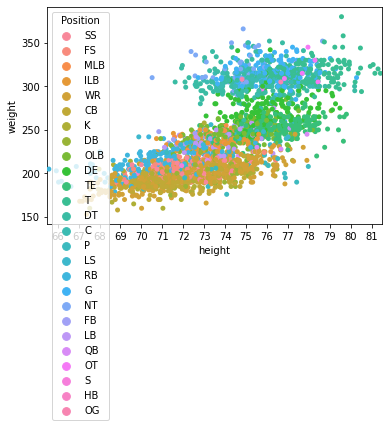

In [37]:
sns.stripplot(data=players, x="height", y="weight", hue="Position",jitter=0.5)